## Neural Networks and Deep learning Introduction

- 3 categories of the book 《深度学习与神经网络》: Machine learning, Neural Network and graphical model

### Introduction

Steps in machine learning process:
- Data preprocessing (missing values, standardization,numerical transformation...)
- feature extraction
- Feature transformation (feature selection such as PCA and LDA)
- fitting and prediction

Important deep learning architectures:
- MLPs
- RNN (Recursive NN)
- GAN (General Adversarial Networks)
- Convolutional Neural Networks
- Autoencoders 
- Transformers 
- Reinforcement Learning

### BPs

For the MLPs, it works in a way like multi-linear regression: we assign different weights to the inputs and convert the weighted value to final output or the output for the next layer using an activation funcion. The activation function can be : Step function, sigmoid function, tanh function, ReLu or leaky ReLU function etc, depending on the output you are expected given the input (Linear ot non-linear, binary classification or multiclass, classification or regression).

Nice property with Sigmoid function:
- First the derivative of a sigmoid function $f'(x) = f(x)(1-f(x))$, which is useful calculating the gradient descent later on. Use the quotient rule to prove:
\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

\begin{equation}
\sigma'(z) = \frac{0-(-e^{-z})}{(1+e^{-z})^2} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1 + e^{-z} - 1}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} - \frac{1}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}}(1 - \frac{1}{1+e^{-z}})
\end{equation}

The problem of this activation function is that the gradient tends to be 0 when the input has high positive or negative value, which will cause problem using gradient descent.To solve this problem, we can adopt ReLU function which works like a call option payoff $max(0,x)$. It gives positive gradient for positive inputs but 0 for negative inputs(dead neurons). To avoid 0 derivative of negative inputs, we can use leakt ReLU. But it does not always work better than ReLU! 

Other cons of sigmoid function: computational cost is high because of exponential term; mean is 0.5 instead of 0, make it difficult in optimization process.

For multilayer neural networks, the output size depends on the problem we are working on: multi-class classification. So the numbers of output layer are what we are trying to fit to. MLPs works as : 

$z^{(1)} = xW^{(1)}$              ----------->      $a^{(1)} = \sigma (z^{(1)})$


$z^{(2)} = a^{(1)} W^{(2)}$       ----------->      $a^{(2)} = \sigma (z^{(2)})$


$z^{(3)} = a^{(2)} W^{(3)}$       ----------->      $\hat y = softmax(z^{(3)})$

where the softmax function produce a probability estimate for each class.(note that we use sigmoid function instead in the output layer for binary classification) We only use softmax in the output layer for multiclassification problem and we do not use it in the hidden layer as activation function.

$Softmax(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$
the sum if probabilities is 1 and events are mutually exclusive.


Summary of final layer activation function:
- Binary classification:
Sigmoid function(suffers from vanishing gradient if there are more layers)

- Multiclass classification:
Softmax

- Regression:
Linear descriminant function

### Training - Cost functions and gradient descent

We need a cost function which measures the error between the true value and the predictionn in orde to train the NN model. Utilimately, we wwant to know how sensitive the cost function is to change in any NN weights and we nee to compute the gradient of this cost function wrt each weight. 

- For regression cost functions:

Output is continuous and minimise the sum of the squared errors: $C = \frac{1}{2m} \sum_{j=1}^{m} (f(z_j^{(L)}) - y_j)^2$ and in regression, the activation function $f(z)$ is usually linear: $\hat y = a_j^{(L)} = w^{(L)T} a_j^{(L-1)} + b^{(L)}$. To minimise the cost fucntion, we compute analytically the partial derivative wrt weight. While the weight is embedded in $f(z) = a_j^{(L)}$, so apply chains rule: 
\begin{equation}
\frac{\partial C}{\partial w_i^{(l)}} = \frac{\partial C}{\partial a_j^{(L)}} \frac{\partial a_j^{(L)}}{\partial w_i^{(l)}} = \frac{1}{m}\sum_{j=1}^{m}(a_j^{(L)} - y_j) \frac{\partial a_j^{(L)}}{\partial w_i^{(l)}}
\end{equation}

for the final layer, its gradient is simply as:
\begin{equation}
\frac{\partial C}{\partial w_i^{(L)}} = \frac{1}{m}\sum_{j=1}^{m}(a_j^{(L)} - y_j) \cdot a_{j}^{(L-1)}
\end{equation} 

as $a_j^{(L)} = w^{(L)T} \cdot a_j^{(L-1)} + b^{(L)}$

While for earlier layer, we need to invoke chain rule.

- For binary classifier cost function:

Since the label outcome $y$ is rather 1 or 0, we then want the prediction $\hat y$ = 1 when $y=1$ and $\hat y=0$ when $y=0$
And we maximise: $\hat y ^{y} \cdot (1 - \hat y)^{1-y}$ for one sample only. For all the sample, we maximise the likelihood function which is $\prod_{i=1}^m (\hat y^{(i)})^{y^{(i)}} \cdot (1 - \hat y^{(i)})^{1-y^{(i)}}$. This is same as minimising its negative log funcion: $C = -\frac{1}{m} \ln \prod_{i=1}^{m}(\hat y ^ {(i)})^{y^{(i)}}(1-\hat y^{(i)})^{1-y^{(i)}} = -\frac{1}{m} \sum_{j=1}^{m}[y^{(j)} \ln(\hat y^{(j)}) + (1-y^{(j)})\ln(1 - \hat y^{(j)})]$

- Regularization Techiniques for Deep Learning

    -> Penalized cost function: Ridge function

    -> Dropout: randomly remove neurons at each iteration to prevent the NN relying on the same path
    
    -> Early stopping: i.e check the validation log-loss every epoch if it is higher than the last time, stop training


- Initialisation of weights 

    -> For backpropagation to work we need to break the weight symmetry which is usually done by randomly assigning values. Initially practitioners used $w_{ij} ~ N(0,1)$ but it was shown that this contributed to the vanishing/exploding gradients as with sigmoid function the variance is greater than the input variances.

    -> Gloriot and Bengio showed that if weights are generated from the distribution $W_{ij} ~ N (0, \frac{1}{\sqrt{0.5 \cdot (N_{in} + N_{out})}})$ where the N's are the number of incoming and outgoing neurons at a node, the gradient problems were both significant reduced 

- Optimizers to update weights

    -> **Momentum** : smoothing out the variation of the inidivdual points 
    
    $ v_t = \eta \cdot v_{t-1} - \alpha \nabla J$ where $\eta$ is the momentum hyper parameter 
    
    $W := W - v_t $

    -> **Nesterov Momentum**

    $ v_t = \eta \cdot v_{t-1} - \alpha \nabla(J - \eta \cdot v_{t-1})$ where $\eta$ is the momentum hyper parameter 
    
    $W := W - v_t $

    -> **AdaGrad**: scale the update of each weight separately

    with starting pont $G_i(0) = 0$:

    $G_i(t) = G_i(t-1) + (\frac{\partial L}{\partial w_i}(t))^2$

    $ W:= W - \frac{\eta}{\sqrt{G_t} + \epsilon} \cdot \nabla J$

    As G continue to increase, this leads to smaller updates each iteration. The updates shrink as close to the optimum so as to avoid overshooting.

    -> **RMSProp**: quite similar to AdaGrad. Rather using sum of previous gradients, RMSProp will decay old gradients more than recent ones

    -> **Adam**: Use both first-order and second-order change information and decay both over time

### Recurrent Neural Networks

- Motivation for RNNs 

is to capture the order-dependent information: such as the word ordering. We hope that it will improve the accuracy of our predictions.
The iterative nature of RNNs makes them approporate for capturing information in **sequences**. They can be used in : Financial time series analysis, speech recognition, language modelling, translation and image captioning. Assume that we have an imput [1,2,3,4,5], the input neurons of ordinary NNs treat them in the same way, so it is not possible to use the architecture of a standard feedforward NN to tell the NN that the information is ordered (number 1 is before 2). Unlike previous supervised training models, we don't have data with features and labels. The output is generally $h_t = f(w_x \cdot X_t + w_h \cdot h_{t-1} + b)$ as time t goes by and a sequence $h_0, h_1, ... , h_t$ are generated.

In some RNN cells, the output function can be differnet from the same activation generating $h_t$. In this case, we would have 

$h_t = f(w_x \cdot X_t + w_h \cdot h_{t-1} + b) , y_t = g(w_y \cdot h_t + b ) $

Possible structure: pass in a series of words from sentence and get sentiment score. Or pass in a time series and get the shifted time series

Problems with RNNs: Vanishing gradients problem that makes the training hard for backpropagation and also limits the length of memory. Hereby, we can overcome by using ReLU instead of Sigmoid function; gradient clipping or LSTMs.

- LSTMs: 

are composed of a cell, an input gate, an output gate and a forget gate. They were developped to  slove the gradients problems.

### Convolutional Neural networks

The buiding blocks of CNN are:

- convolutional layers: A comvolutional layer is where K filters are applied to the orginal image. The outputs are K feature maps, the filter weights are parameters of the convolutional layer that are learned through backpropagation during the training process

- pooling layers

- fully connected layers


In practice, we use cross-correlation in stead of real convolution to save cost. The only difference is that whether the kernel is rotated, so the real convolution should rotate 180 degree when mutiplying the filter/kernel.

- One-dimension convolution always used in signal processing to calcualte the cumulation of information. Generally speaking, the length of filter is smaller than the length of convolutions. Specially, when the filter weights are equally divided $w = [1/K,1/K..., 1/K]$ then the convolution (y) is the moving average of series of signals (x) $y = w * x$. When the fiter weights are [1,-2,1], we can achieve an approximation of second diffrential of signals: $x^{''}(t) = x(t+1) + x(t-1) - 2x(t)$.


- 2-dimension convolution used in image processing. 



- So far, the structure of our neural network treats all inputs interchangeably and no relationship between the individual inputs. The inputs are just an ordered set of variables. For example, if we use fully connected feedforward NN to process images (colored image has 200x200x3 pixels) meaning that there are 200x200x3 connections (weights) between one hidden layer perceptron and input layer. more neutrons in the hidden layer --> more parameters --> overfitting and inefficient

- In CNN, one can use kernel or filter to detect the features. The kernel is a matrix of weights with horizontal or vertical edge that one multiply convolution to obtain an output of feature map.

- Grid size of kernel: typically use odd numbers (3x3 for example) so that there is a **center** pixel. The kenel does not need to be a square, it can be (1x3) or (3x1) etc

- Padding: using kernel directly, there will be an "edge effect", so that it is possible that we do not put as much weight along each one of the edges. The pixels near the edge will not be used as 'center pixels' since there are not enough surrounding pixels. With padding, the output size will also be larger

- Stride: the srep size as the kernel matrix moves across the image. When the stride is greater than 1, it scales down the output dimension. Stride can also be less than 1, it is called Fractionally-strided convolution so that we can scale up the output dimension.

- Depth: In images, we have multiple numbers associated with each pixel location and these numbers are referred to as channels (RGB has 3 channels). The number of channels is referred to as 'depth'. The kernel will have same depth as the number of input channels. For example, a 5x5 RGB kernerl has 5x5x3 weights. The output from the layer will also have a depth. If there are 10 kernels in a layer, the output of that layer will have a depth = 10 

- Pooling: idea is to reduce the image size by mapping a patch of pixels to a single value. It does not need to have parameters and shrinks the dimension of the image. Can be 'max-pooling'(select the brightest pixel) or 'sum-' or 'average-pooling'(smooth out images and sharp features may not be identified). 

### Linear regression demo:

In [2]:
import numpy as np

In [25]:
np.random.seed(1234)
nums = 100
x1 = np.random.uniform(0,10,nums)
x2 = np.random.uniform(0,10,nums)
cons = np.ones(100)
err = np.random.normal(0,0.5,nums)

b = 1.5
theta1 = 2
theta2 = 5

y = b*cons + theta1 * x1 + theta2*x2 + err

X_matrix = np.array([cons,x1,x2]).T
X_matrix.shape
y.shape


(100,)

In [52]:
#generate weight matrix ans assign a weight to each sample
weights = np.random.uniform(0,1,nums)
ones = np.ones(nums)
weight_mat = np.diag(weights)

y_new = b*cons*ones + theta1*weights*x1 + theta2*weights*x2 + err

print(weight_mat.shape)
print(y_new.shape)

(100, 100)
(100,)


In [53]:
X_matrix_new = np.array([cons*ones,x1*weights,x2*weights]).T
X_matrix_new.shape

(100, 3)

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=False).fit(X_matrix,y)
LR.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [48]:
## Analytical solution
Coeffs = np.linalg.inv(X_matrix.T@X_matrix)@X_matrix.T@y
Coeffs

array([1.49004618, 1.99675416, 5.01156315])

In [54]:
# Now with weighted observations
LR_new = LinearRegression(fit_intercept=False).fit(X_matrix_new,y_new)
LR_new.coef_

array([1.46680125, 1.98799369, 5.03784867])

In [57]:
## Analytical solution
Coeffs_new = np.linalg.inv(X_matrix_new.T@weight_mat@X_matrix_new)@X_matrix_new.T@weight_mat@y_new
Coeffs_new

array([1.57125565, 1.96793138, 5.02742755])

- Gradient descent demo

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import time as time 

In [71]:
learning_rate = 1e-3
num_iter = 10000
theta_init = np.array([3,3,3])

In [72]:
def gradient_descent(learning_rate, num_iter, theta_initial):
    """
    function to complet gradient descent
    """
    theta = theta_init
    theta_path = np.zeros((num_iter+1,3))
    theta_path[0,:] = theta_init
    
    loss_vec = np.zeros(num_iter)
    
    for i in range(num_iter):
        y_pred = np.dot(theta.T, X_matrix.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(X_matrix)/nums
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:] = theta
    return theta_path, loss_vec

true_coef = [b,theta1,theta2]

def plot_ij(theta_path,i,j,ax):
    ax.plot(true_coef[i],true_coef[j],marker='p',markersize = 15, label='True Coefs',color='r')
    ax.plot(theta_path[:,i],theta_path[:,j],color='k',linestyle='--',marker='^',markersize=5,markevery=50)
    ax.plot(theta_path[0,i],theta_path[0,j],color='g',label='start',marker='o',markersize=15)
    ax.plot(theta_path[-1,i],theta_path[-1,j],color='b',label='finish',marker='d',markersize=15)
    ax.set(xlabel='theta'+str(i), ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')    
def plot_all(theta_path,loss_vec,learning_rate,num_iter,theta_init,gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16,16))
    title = '{gdtype} in the 3rd parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate,iters=num_iter,initial = theta_init)
    
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2,2,1)
    plot_ij(theta_path,0,1,ax)
    ax = fig.add_subplot(2,2,2)
    plot_ij(theta_path,0,2,ax)
    ax = fig.add_subplot(2,2,3)
    plot_ij(theta_path,1,2,ax)
    ax = fig.add_subplot(2,2,4)
    ax.plot(loss_vec)
    ax.set(xlabel = 'iterations', ylabel = 'squared loss')
    ax.grid(True)

gradient descent took 0.2s.1000
gradient descent took 0.2s.10000
gradient descent took 1.9s.100000


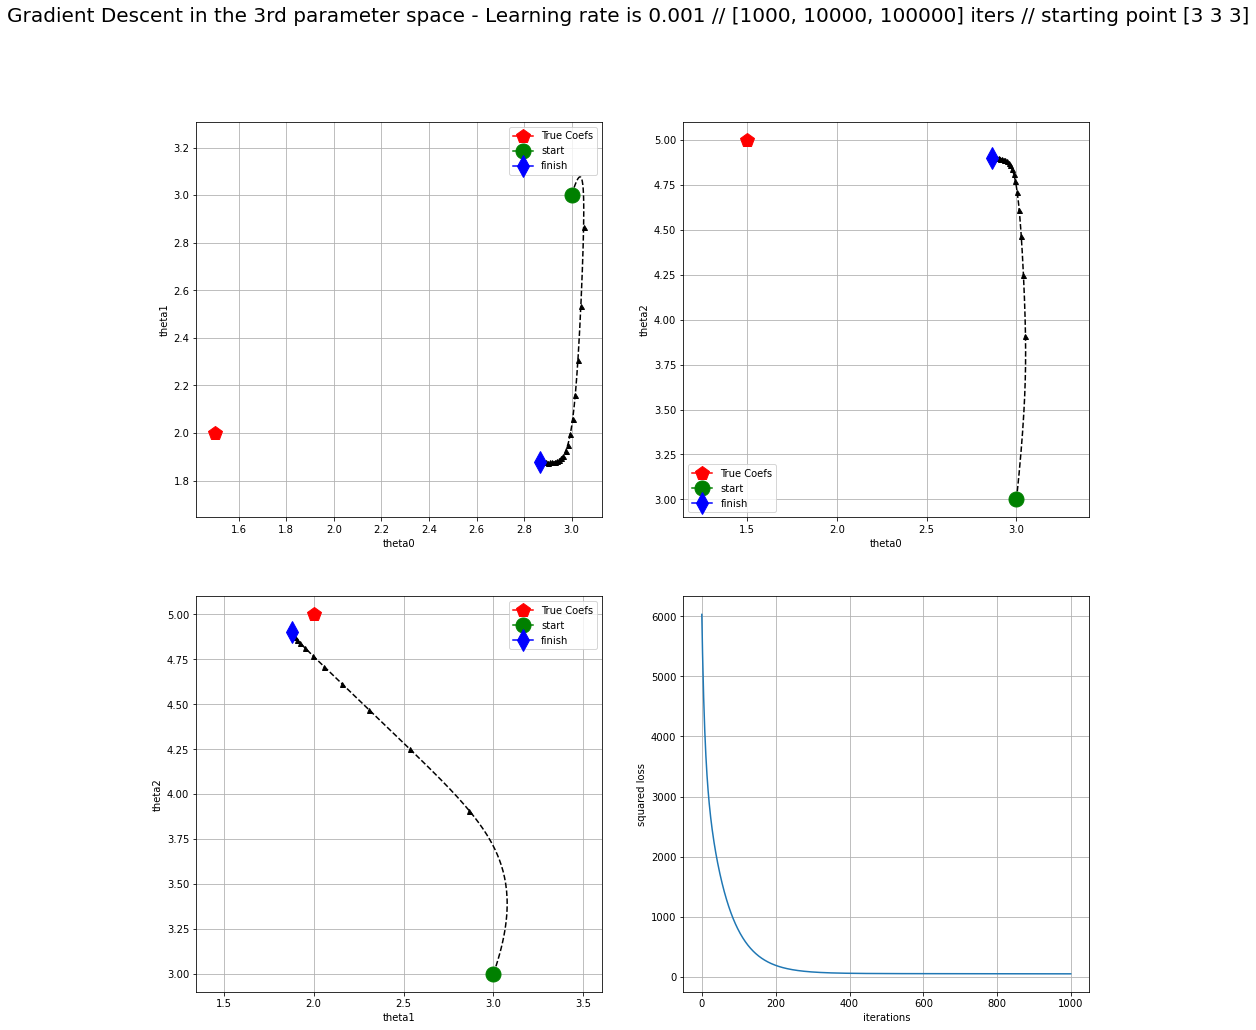

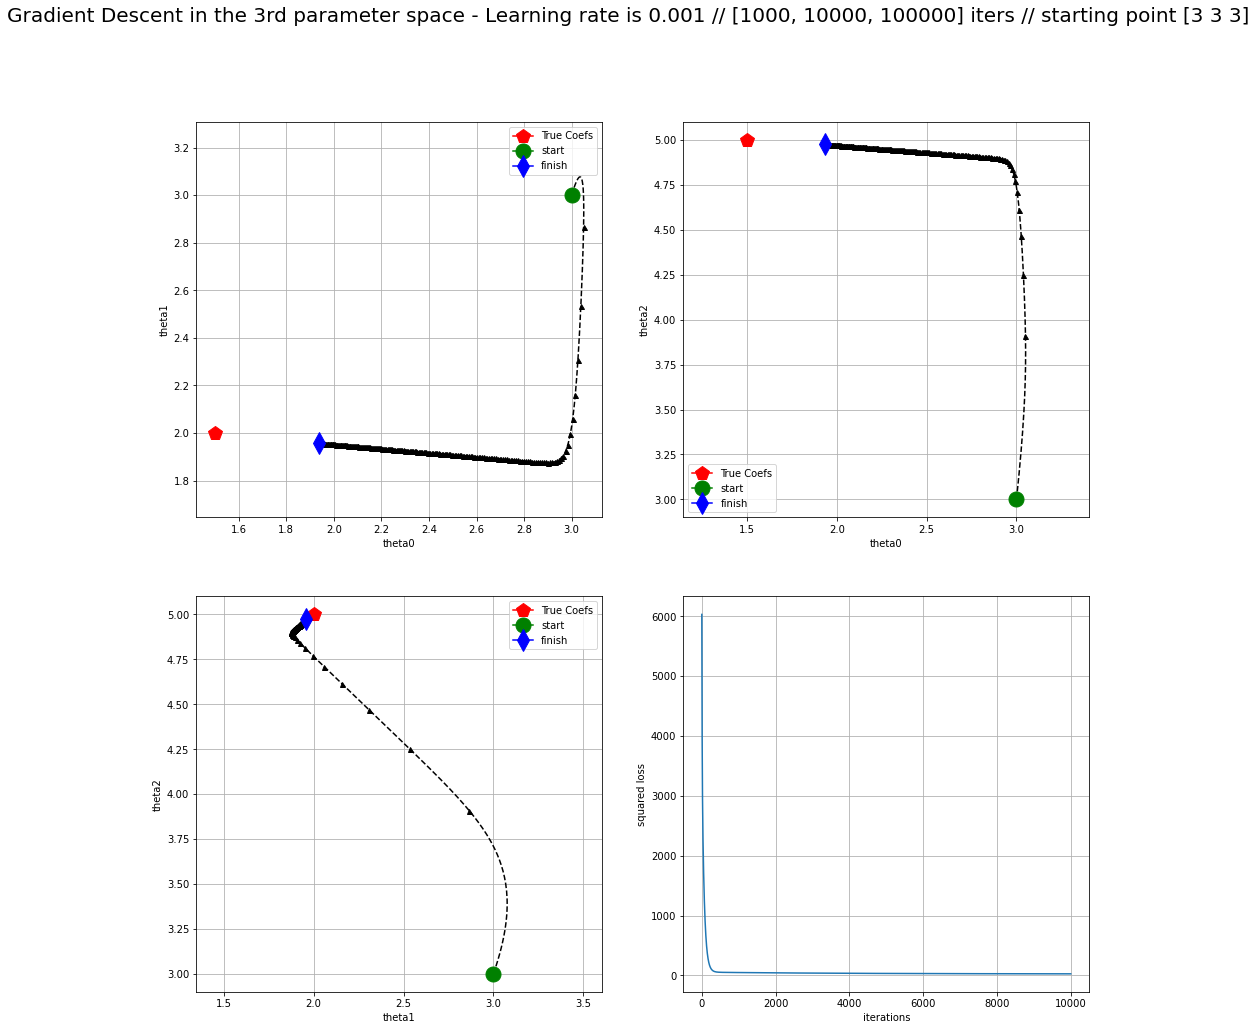

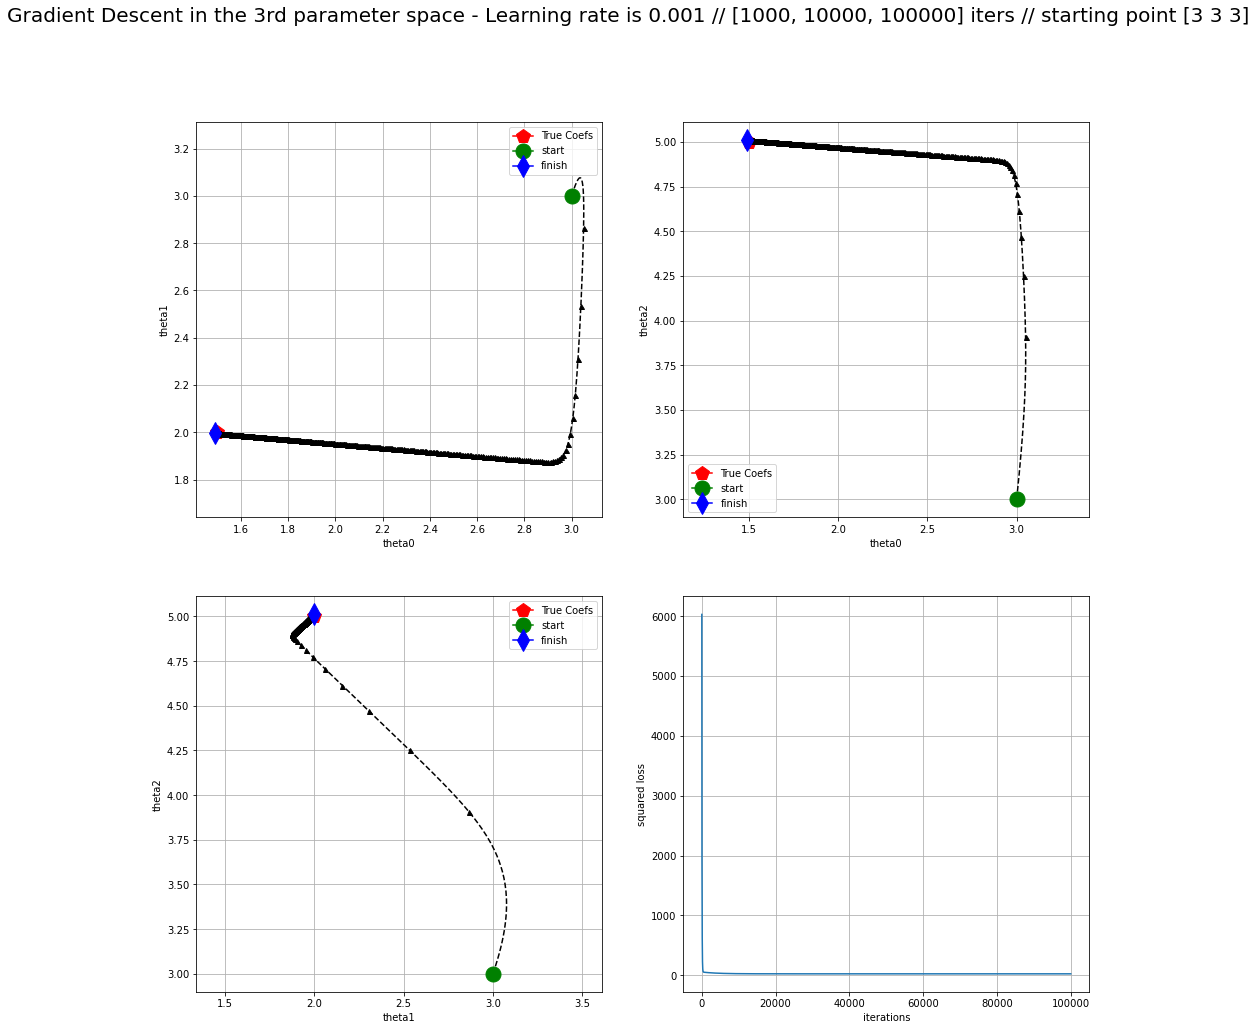

In [84]:
num_iter = [1000,10000,100000]
theta_path=[]
loss_vec=[]
for i in range(len(num_iter)):
    t0 = time.time()
    theta_path.append(gradient_descent(learning_rate,num_iter[i],theta_init)[0])
    loss_vec.append(gradient_descent(learning_rate,num_iter[i],theta_init)[1])
    plot_all(theta_path[i],loss_vec[i],learning_rate,num_iter,theta_init)
    t1 = time.time()
    k = num_iter[i]
    print('gradient descent took {:.1f}s.'.format(t1-t0) + str(k))

- Neural network

Experiment with neuron computations and show how to represent basic logic functions like AND,OR,XOR using single neurons and find out how to represent neural networks as a chain of matri computations

In [10]:
# define the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

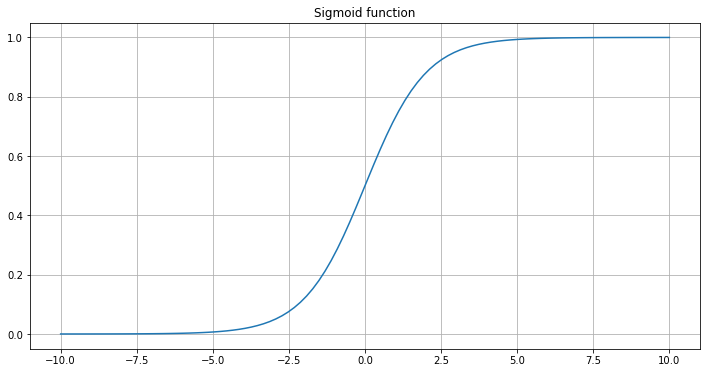

In [11]:
#plot the sigmoid function
inputs = np.linspace(-10,10,100)
vals = sigmoid(inputs)
fig = plt.figure(figsize=(12,6))
plt.title('Sigmoid function')
plt.plot(inputs,vals)
plt.grid(True)

- Backpropagation in NN

Calculate the final outputs from initial inputs (feed-forward), then determine the cost function from true values and outputs and calculated the partial derivatives wrt weights, update the weights and repeat a fixed times.

In [4]:
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size=(num_obs,2))
x_mat_2 = np.ones((num_obs,1))
x_mat_full = np.concatenate((x_mat_1,x_mat_2),axis=1)
x_mat_full

array([[-0.03514356,  0.12898594,  1.        ],
       [-0.55225362, -0.97391287,  1.        ],
       [-0.60750184,  0.55579454,  1.        ],
       ...,
       [-0.73570065,  0.2060427 ,  1.        ],
       [-0.03115546,  0.93938091,  1.        ],
       [ 0.41533403, -0.97748628,  1.        ]])

shape of x_mat_full is (500, 3)
shape of y is (500,)


(-1.0973500056326144,
 1.0893950228308413,
 -1.0916394345480935,
 1.0918303076447429)

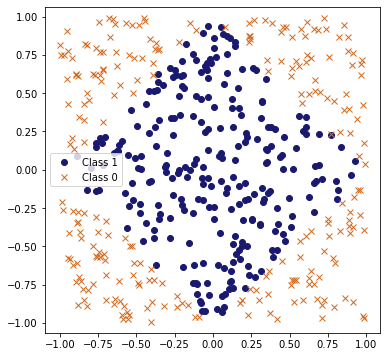

In [9]:
# define the y - True values
# Diamond pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1])) < 1).astype(int)

#Circle pattern
# y = (np.sqrt(x_mat_full[:,0] ** 2 + x_mat_full[:,1]**2 ) < 0.75).astype(int)

#Centered pattern
# y = ((np.maximum(x_mat_full[:,0],np.abs(x_mat_full[:,1]))) < .5).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(x_mat_full[y==1,0], x_mat_full[y==1,1],'o',label='Class 1',color='midnightblue')
ax.plot(x_mat_full[y==0,0], x_mat_full[y==0,1],'x',label='Class 0',color='chocolate')
ax.legend(loc='best')
ax.axis('equal')

In [18]:
def loss_func(y_true,y_pred,eps=1e-16):
    """
    loss function to minimize
    logarithmic loss
    """
    y_pred = np.maximum(y_pred,eps) #if prediction is 0 then takes eps / while prediction is 1 nothing change
    y_pred = np.minimum(y_pred,(1-eps)) # if prediction is 1 then takes (1-eps)~1 / while prediction is 0 nothing change
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true) * np.log(1-y_pred)) )/len(y_true) 
# Note: if prediction is correct then the 2 parts cancel out / if incorrect then the loss will add up one part of them

def forward_pass(W1,W2):
    """
    feed forward computation of the neural network
    takes the global input x_mat and produce the output y_pred
    """
    global x_mat
    global y
    global num_
    
    z_2 = np.dot(x_mat,W1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2,W2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    
    #Compute the gradients which we need to update later on
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad,a_2)
    a_2_z_2_grad = sigmoid(z_2)* (1-sigmoid(z_2))
    J_W_1_grad = ( np.dot((J_z_3_grad).reshape(-1,1), W2.reshape(-1,1).T) * a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad,J_W_2_grad)
    
    return y_pred,gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16,8))
    #fig.title('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1,2,1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel = 'iteration', title='Log Loss')
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations',title = 'Accuracy')

iteration 0, log loss is 0.8297, accuracy is 0.4840
iteration 200, log loss is 0.6874, accuracy is 0.6260
iteration 400, log loss is 0.6684, accuracy is 0.6540
iteration 600, log loss is 0.5886, accuracy is 0.7560
iteration 800, log loss is 0.5069, accuracy is 0.7800
iteration 1000, log loss is 0.4797, accuracy is 0.7800
iteration 1200, log loss is 0.4704, accuracy is 0.7840
iteration 1400, log loss is 0.4535, accuracy is 0.7960
iteration 1600, log loss is 0.4041, accuracy is 0.8260
iteration 1800, log loss is 0.3475, accuracy is 0.8580
iteration 2000, log loss is 0.3097, accuracy is 0.8840
iteration 2200, log loss is 0.2809, accuracy is 0.9020
iteration 2400, log loss is 0.2531, accuracy is 0.9100
iteration 2600, log loss is 0.2293, accuracy is 0.9220
iteration 2800, log loss is 0.2107, accuracy is 0.9380
iteration 3000, log loss is 0.1967, accuracy is 0.9440
iteration 3200, log loss is 0.1862, accuracy is 0.9460
iteration 3400, log loss is 0.1780, accuracy is 0.9520
iteration 3600, l

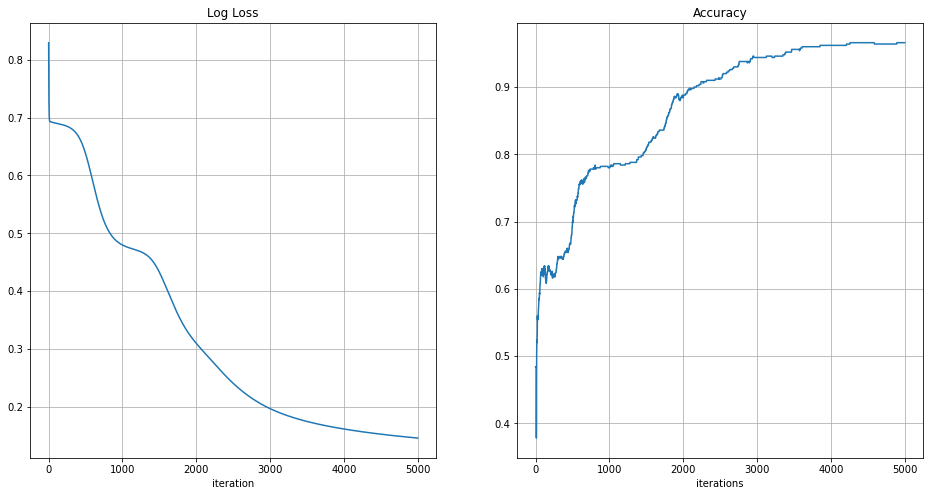

In [25]:
np.random.seed(1241)

W1 = np.random.uniform(-1,1,size=(3,4))
W2 = np.random.uniform(-1,1,size=(4))

num_iter = 5000
lr = 1e-3
x_mat = x_mat_full

loss_vals, accuracies = [],[]
for i in range(num_iter):
    y_pred,(J_W_1_grad, J_W_2_grad) = forward_pass(W1,W2)
    
    #update the weights
    W1 = W1 - lr*J_W_1_grad
    W2 = W2 - lr*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_func(y,y_pred) 
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred >= .5) == y)/num_obs
    accuracies.append(acc)
    
    ###print the loss and accuracy for every 200th iteration
    if ((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {:.4f}'.format(i, curr_loss, acc))
plot_loss_accuracy(loss_vals, accuracies)

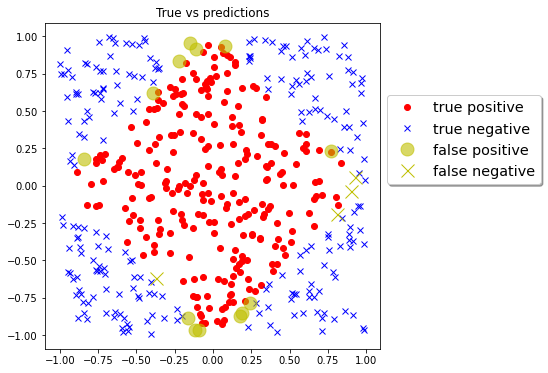

In [26]:
pred1 = (y_pred >= 0.5)
pred0 = (y_pred <= 0.5)

fig,ax = plt.subplots(figsize = (6,6))
#true prediction
ax.plot(x_mat[pred1 & (y==1),0], x_mat[pred1 & (y==1),1],'ro',label='true positive')
ax.plot(x_mat[pred0 & (y==0),0], x_mat[pred0 & (y==0),1],'bx',label='true negative')
# False prediction
ax.plot(x_mat[pred1 & (y==0),0], x_mat[pred1 & (y==0),1],'yo',label='false positive',markersize = 13, alpha = 0.6)
ax.plot(x_mat[pred0 & (y==1),0], x_mat[pred0 & (y==1),1],'yx',label='false negative',markersize = 13)

ax.set(title = 'True vs predictions')
ax.legend(bbox_to_anchor=(1,0.8),fancybox= True, shadow=True,fontsize='x-large')

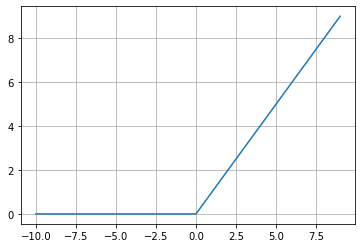

In [41]:
def ReLU_demo(x):
    return np.maximum(x,0)

x = np.arange(-10,10,1)
yaxis=ReLU_demo(x)
plt.plot(x,yaxis)
plt.grid(True)

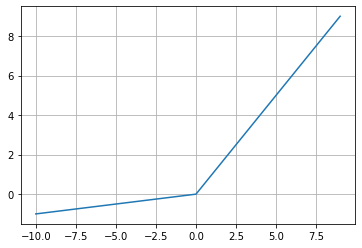

In [40]:
def LReLU_demo(x,scalar=0.1):
    res=[]
    for val in x:
        if val > 0:
            res.append(val)
        else:
            res.append(scalar*val)
    return res
y_axis = LReLU_demo(x)
plt.plot(x,y_axis)
plt.grid(True)

- Keras buiding NN structure

In [4]:
#Setup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [6]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(f'data/diabetes.csv', names=names, header=0)

In [7]:
print(diabetes_df.shape)
diabetes_df.head()

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
# We can see that it is not a balance dataset: we can get an accuracy of 65% without any model
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [10]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [16]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid')) # as there are 8 features
model_1.add(Dense(1,activation='sigmoid'))

In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model
model_1.compile(optimizer = SGD(lr = .003,momentum=0.1,nesterov=True), loss="binary_crossentropy",metrics=['accuracy'])
run_hist_1 = model_1.fit(X_train_norm,y_train,validation_data=(X_test_norm,y_test),epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.5920 - val_loss: 0.6872 - val_accuracy: 0.6094
Epoch 2/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6042 - val_loss: 0.6830 - val_accuracy: 0.6094
Epoch 3/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.6215 - val_loss: 0.6792 - val_accuracy: 0.6042
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6250 - val_loss: 0.6758 - val_accuracy: 0.6094
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6233 - val_loss: 0.6728 - val_accuracy: 0.6042
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6302 - val_loss: 0.6700 - val_accuracy: 0.5990
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6372 - val_loss: 0.6675 - val_accuracy: 0.6094
Epoch 8/200
1

In [44]:
y_pred_class_nn_1 = (model_1.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [46]:
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [25]:
y_pred_prob_nn_1[:10]

array([[0.3303862 ],
       [0.5064947 ],
       [0.37135017],
       [0.46538055],
       [0.2605256 ],
       [0.33383402],
       [0.20213732],
       [0.40177095],
       [0.558045  ],
       [0.29600292]], dtype=float32)

In [29]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.771
roc-auc is 0.829


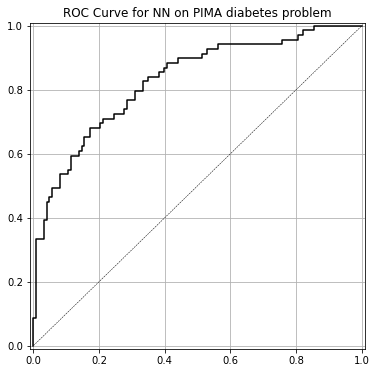

In [47]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [31]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

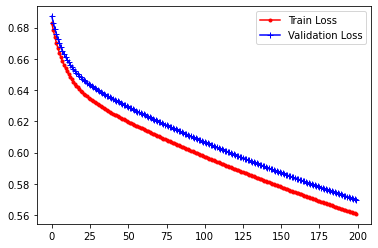

In [32]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='+', label="Validation Loss")
ax.legend()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

In [33]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.6927 - val_loss: 0.5695 - val_accuracy: 0.7031
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.6962 - val_loss: 0.5692 - val_accuracy: 0.7031
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.6962 - val_loss: 0.5689 - val_accuracy: 0.7031
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.6962 - val_loss: 0.5685 - val_accuracy: 0.7031
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.6962 - val_loss: 0.5682 - val_accuracy: 0.7083
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.6962 - val_loss: 0.5679 - val_accuracy: 0.7135
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.6962 - val_loss: 0.5675 - val_accuracy: 0.7135
Epoch 

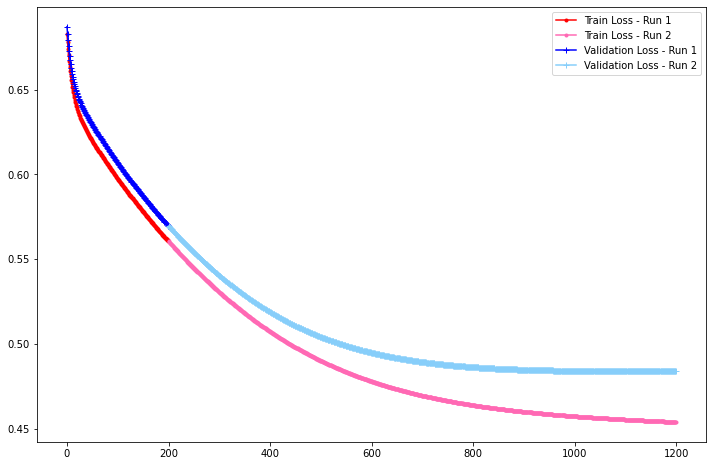

In [37]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='+', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='+',  label="Validation Loss - Run 2")

ax.legend()

In [38]:
### BEGIN SOLUTION that we add one more layer/ the acivation function also change to ReLU
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.6213 - accuracy: 0.6962 - val_loss: 0.6196 - val_accuracy: 0.7083
Epoch 2/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6962 - val_loss: 0.6179 - val_accuracy: 0.7083
Epoch 3/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7031 - val_loss: 0.6163 - val_accuracy: 0.7188
Epoch 4/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7083 - val_loss: 0.6148 - val_accuracy: 0.7188
Epoch 5/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7083 - val_loss: 0.6134 - val_accuracy: 0.7135
Epoch 6/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7066 - val_loss: 0.6120 - val_accuracy: 0.7188
Epoch 7/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7101 - val_loss: 0.6106 - val_accuracy: 0.7188
Epoch 

In [39]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

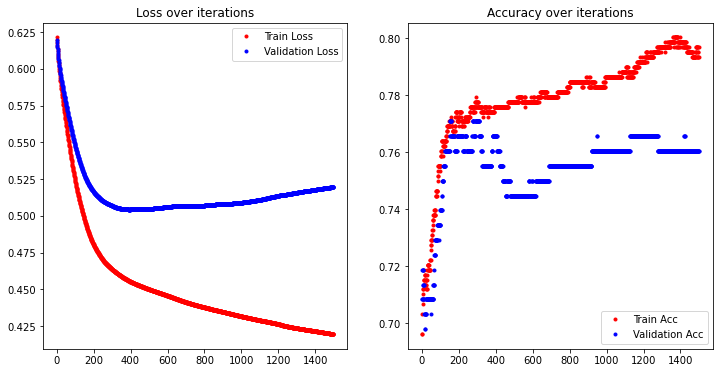

In [40]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')


accuracy is 0.760
roc-auc is 0.810


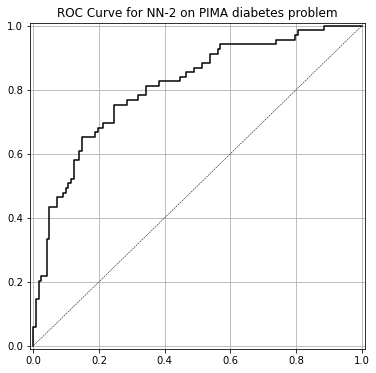

In [43]:
y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')

### Recurrent Neural Networks

In [1]:
import numpy as np
import sklearn
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

In [3]:
np.__version__

'1.20.3'

In [8]:
tf.test.is_gpu_available(cuda_only=True)

False

### Convolutional Neural Networks

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

170508288/170498071 [==============================] - 46s 0us/step
X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#each image is a 32x32x3 numpy array
X_train[444].shape

(32, 32, 3)

[9]


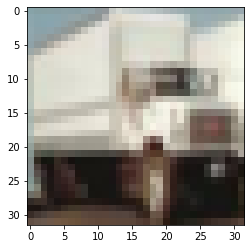

In [4]:
print(y_train[444])
plt.imshow(X_train[444])

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
num_class = 10

y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

the num of classes becomes one-hot encoder. Notice that the truck is classified as 9

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
model_1 = Sequential()

# 5x5 convolution with 2x2 strides and 32 filters
model_1.add(Conv2D(32,(5,5),strides=(2,2),padding='same',input_shape = X_train.shape[1:]))
model_1.add(Activation('relu'))

#anaother 5x5 convolution with 2x2 stride
model_1.add(Conv2D(32,(5,5),strides=(2,2)))
model_1.add(Activation('relu'))

# 2x2 max pooling reduces to 3 x 3 x 32 
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

#flatten 3x3x32 to 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_class))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

In [12]:
batch_size=32

opt = keras.optimizers.RMSprop(lr=0.0005,decay = 1e-6)

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = opt,
                metrics=['accuracy'])
model_1.fit(X_train,y_train,
                batch_size=batch_size,
                epochs = 15,
                validation_data = (X_test,y_test),
                shuffle = True)

C:\Users\yuanp\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7255 - accuracy: 0.3669 - val_loss: 1.4487 - val_accuracy: 0.4694
Epoch 2/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4534 - accuracy: 0.4737 - val_loss: 1.3042 - val_accuracy: 0.5323
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3478 - accuracy: 0.5175 - val_loss: 1.3801 - val_accuracy: 0.5087
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2819 - accuracy: 0.5434 - val_loss: 1.1755 - val_accuracy: 0.5841
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2373 - accuracy: 0.5586 - val_loss: 1.1221 - val_accuracy: 0.6053
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2025 - accuracy: 0.5723 - val_loss: 1.2090 - val_accuracy: 0.5694
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1752 - accuracy: 0.5871 - val_loss: 1.2079 - val_

In [16]:
import numpy as np

In [17]:
predict_x=model_1.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([3, 1, 1, ..., 5, 4, 7], dtype=int64)

In [18]:
np.argmax(y_test,axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [20]:
model_2 = Sequential()

# 5x5 convolution with 2x2 strides and 32 filters
model_2.add(Conv2D(32,(3,3),padding='same',input_shape = X_train.shape[1:]))
model_2.add(Activation('relu'))


model_2.add(Conv2D(32,(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64,(3,3),padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64,(3,3)))
model_2.add(Activation('relu')) 
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

#flatten 3x3x32 to 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_class))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [21]:
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = opt_2,
                metrics=['accuracy'])
model_2.fit(X_train,y_train,
            batch_size=batch_size,
            epochs = 5,
            validation_data = (X_test,y_test),
            shuffle = True)

C:\Users\yuanp\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5581 - accuracy: 0.4369 - val_loss: 1.2639 - val_accuracy: 0.5447
Epoch 2/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.1686 - accuracy: 0.5895 - val_loss: 0.9913 - val_accuracy: 0.6472
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0109 - accuracy: 0.6485 - val_loss: 0.9062 - val_accuracy: 0.6924
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9165 - accuracy: 0.6815 - val_loss: 0.8398 - val_accuracy: 0.7070
Epoch 5/5
1563/1563 [==============================] - 94s 60ms/step - loss: 0.8546 - accuracy: 0.7052 - val_loss: 0.9963 - val_accuracy: 0.6774
